In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error 

In [2]:
df = pd.read_csv('/Users/jmrrahmaan/Desktop/adult_3.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Checking for null data

df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
# Dropping null values from database

df.dropna(inplace=True)

In [9]:
#  Drop rows with missing values
df.dropna(inplace=True)


In [10]:
df.drop_duplicates(inplace=True)

In [12]:
# Checking Unique Value count of Gender

df['gender'].value_counts()

gender
Male      32614
Female    16176
Name: count, dtype: int64

In [13]:
df['income'].value_counts()


income
<=50K    37109
>50K     11681
Name: count, dtype: int64

In [14]:
X = df.drop('income', axis=1)
y = df['income']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
df.select_dtypes(include='object').columns


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [19]:
df = pd.get_dummies(df, drop_first=True)


In [21]:
print(df.columns)


Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native-country_Puerto-Rico', 'native-country_Scotland',
       'native-country_South', 'native-country_Taiwan',
       'native-country_Thailand', 'native-country_Trinadad&Tobago',
       'native-country_United-States', 'native-country_Vietnam',
       'native-country_Yugoslavia', 'income_>50K'],
      dtype='object', length=101)


In [22]:
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']


In [24]:
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8570403771264603
              precision    recall  f1-score   support

       False       0.89      0.93      0.91      7440
        True       0.74      0.62      0.67      2318

    accuracy                           0.86      9758
   macro avg       0.81      0.78      0.79      9758
weighted avg       0.85      0.86      0.85      9758



In [26]:
import joblib
joblib.dump(model, 'salary_prediction_model.pkl')


['salary_prediction_model.pkl']

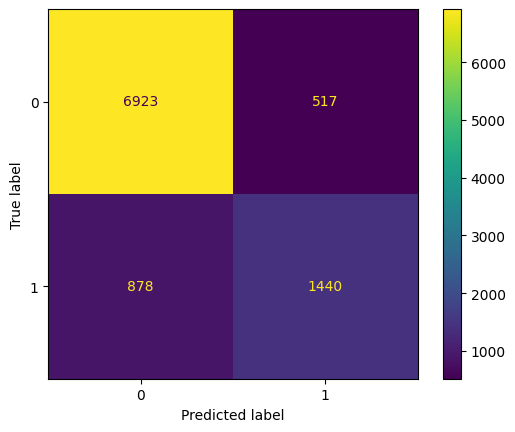

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


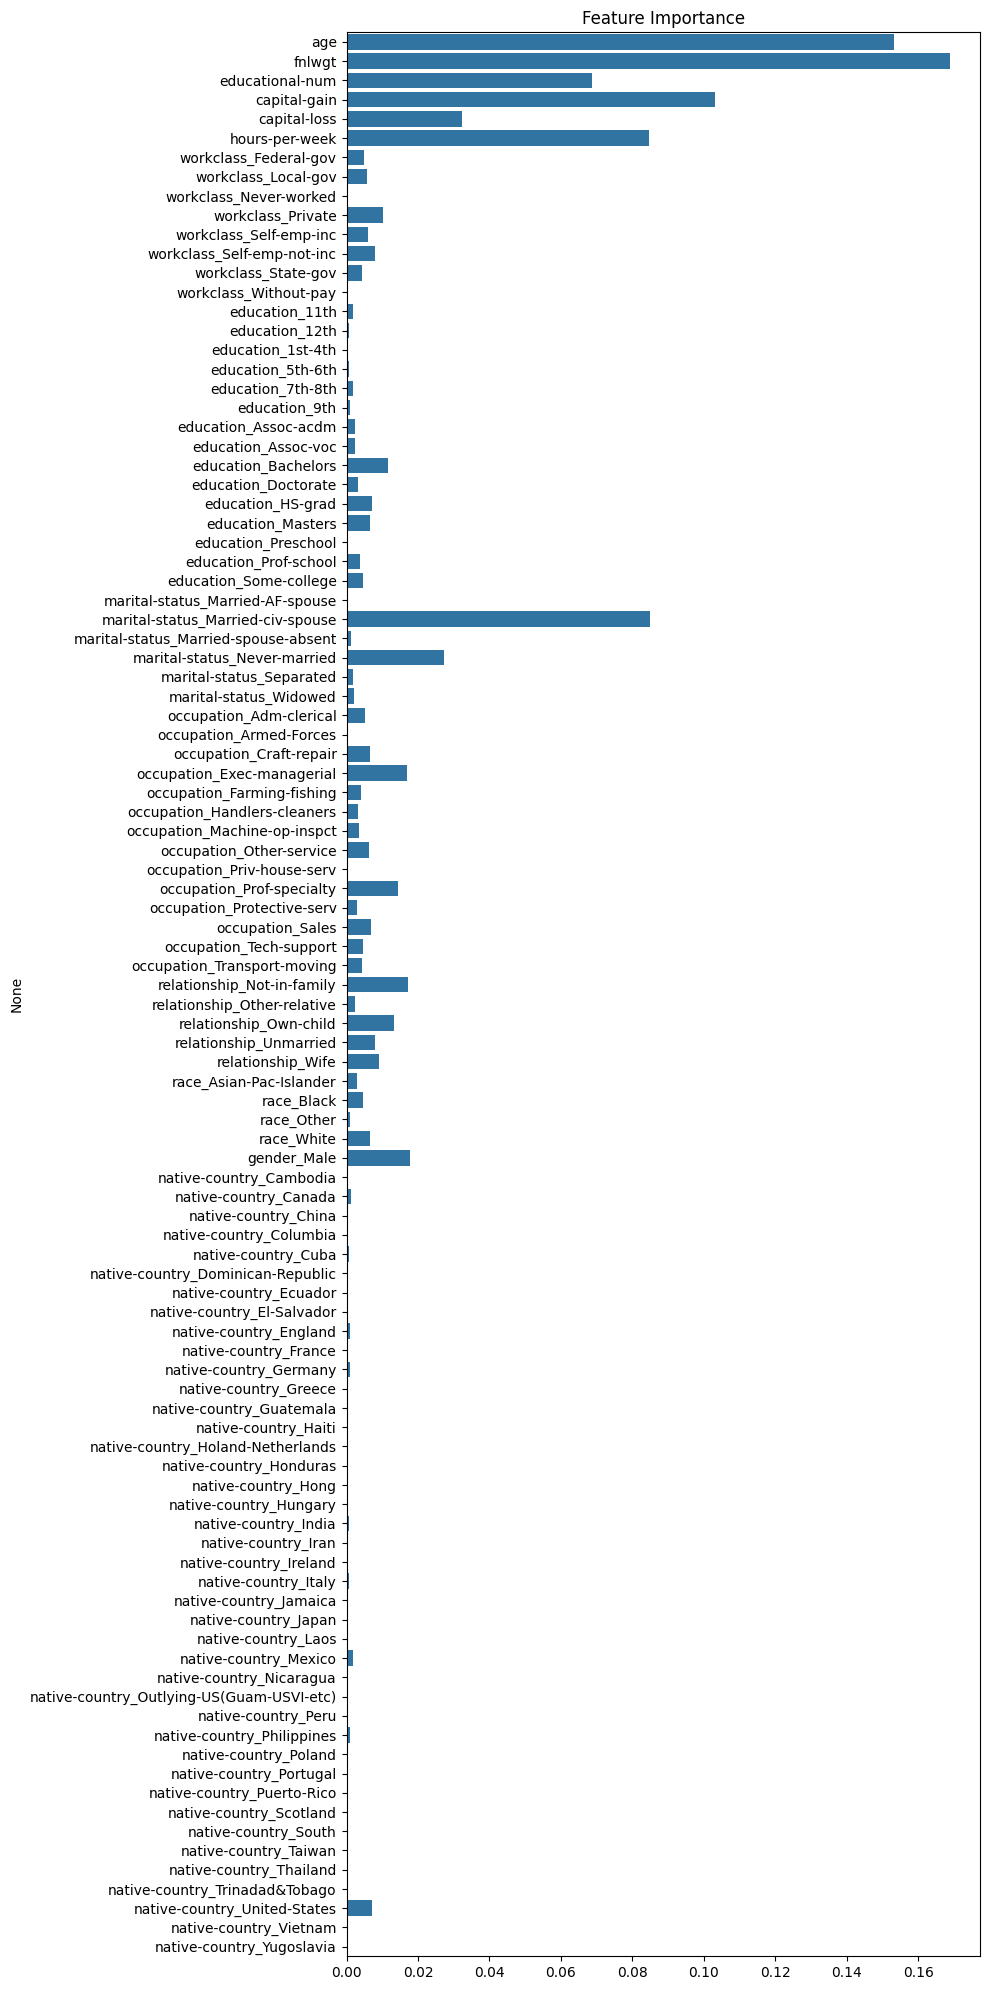

In [34]:
importances = model.feature_importances_
features = X.columns

# Visualize
plt.figure(figsize=(10,20))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [35]:
import joblib

# Saving the model
joblib.dump(model, 'salary_prediction_model.pkl')



['salary_prediction_model.pkl']

In [36]:
sample = X.iloc[0] 
sample = sample.values.reshape(1, -1)

prediction = model.predict(sample)
print("Prediction:", prediction)


Prediction: [False]


In [38]:
!pip install termcolor



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [39]:
import numpy as np
import pandas as pd
from termcolor import colored 

sample_index = 0
sample = X.iloc[sample_index]
sample_reshaped = sample.values.reshape(1, -1)

# Prediction
prediction = model.predict(sample_reshaped)[0]

# Interpret prediction
result_text = "Income >50K" if prediction == 1 else "Income <=50K"

# Simulate a name for fun
employee_name = f"Employee #{sample_index + 1}"

# Output result with some flair
print(f" Predicting salary for {employee_name}...")
print(f" Features used: {list(X.columns)}")
print(f" Prediction Result: {colored(result_text, 'green' if prediction == 1 else 'red')}")


 Predicting salary for Employee #1...
 Features used: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishi

In [40]:
def predict_salary(sample_index):
    sample = X.iloc[sample_index]
    sample_reshaped = sample.values.reshape(1, -1)
    
    prediction = model.predict(sample_reshaped)[0]
    result_text = "Income >50K " if prediction == 1 else "Income <=50K "
    employee_name = f"Employee #{sample_index + 1}"
    
    # Print clean summary
    print("="*50)
    print(f" Predicting salary for {employee_name}")
    print("-"*50)
    print(f" Key Features (first 6):")
    print(sample.head(6).to_string())  # only show first few features
    print("-"*50)
    print(f" Prediction Result: {result_text}")
    print("="*50)


predict_salary(0)


 Predicting salary for Employee #1
--------------------------------------------------
 Key Features (first 6):
age                    25
fnlwgt             226802
educational-num         7
capital-gain            0
capital-loss            0
hours-per-week         40
--------------------------------------------------
 Prediction Result: Income <=50K 


In [43]:
print(df.columns.tolist())


['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machi

In [44]:
df['income_>50K'].unique()


array([False,  True])

In [49]:
print(y_train.isnull().sum())


39032


In [57]:
sns.set(style="whitegrid")

In [59]:
print(df.columns)


Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native-country_Puerto-Rico', 'native-country_Scotland',
       'native-country_South', 'native-country_Taiwan',
       'native-country_Thailand', 'native-country_Trinadad&Tobago',
       'native-country_United-States', 'native-country_Vietnam',
       'native-country_Yugoslavia', 'income'],
      dtype='object', length=101)


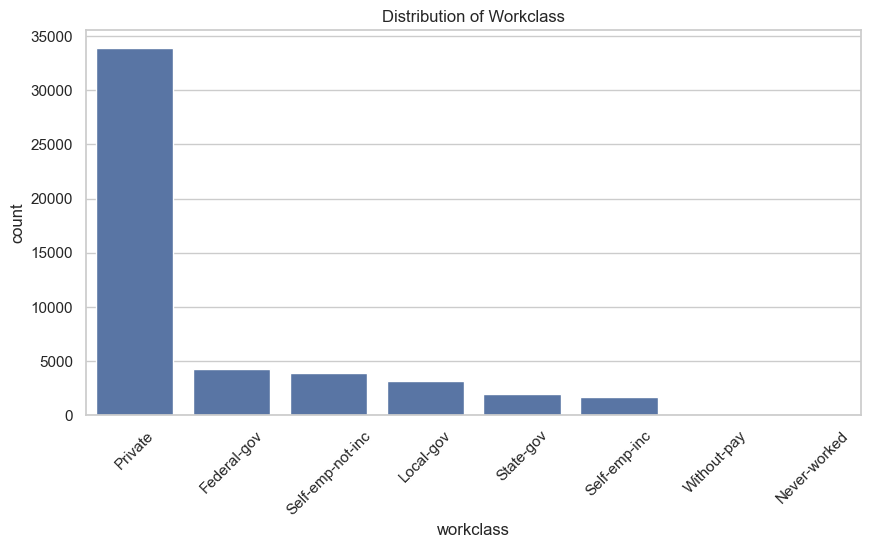

In [61]:
# Step 1: Identify workclass columns (those that start with "workclass_")
workclass_cols = [col for col in df.columns if col.startswith('workclass_')]

# Step 2: Recreate 'workclass' column
df['workclass'] = df[workclass_cols].idxmax(axis=1).str.replace('workclass_', '')

# Step 3: Plot the graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='workclass', order=df['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Workclass')
plt.show()


In [79]:
def predict_salary(sample_index):
    sample = X.iloc[sample_index]
    sample_reshaped = sample.values.reshape(1, -1)
    
    prediction = model.predict(sample_reshaped)[0]
    result_text = "Income >50K " if prediction == 1 else "Income <=50K "
    employee_name = f"Employee #{sample_index + 1}"
    
    # Print clean summary
    print("="*50)
    print(f" Predicting salary for {employee_name}")
    print("-"*50)
    print(f" Key Features (first 6):")
    print(sample.head(6).to_string())  # only show first few features
    print("-"*50)
    print(f" Prediction Result: {result_text}")
    print("="*50)


predict_salary(0)


 Predicting salary for Employee #1
--------------------------------------------------
 Key Features (first 6):
age                    25
fnlwgt             226802
educational-num         7
capital-gain            0
capital-loss            0
hours-per-week         40
--------------------------------------------------
 Prediction Result: Income <=50K 


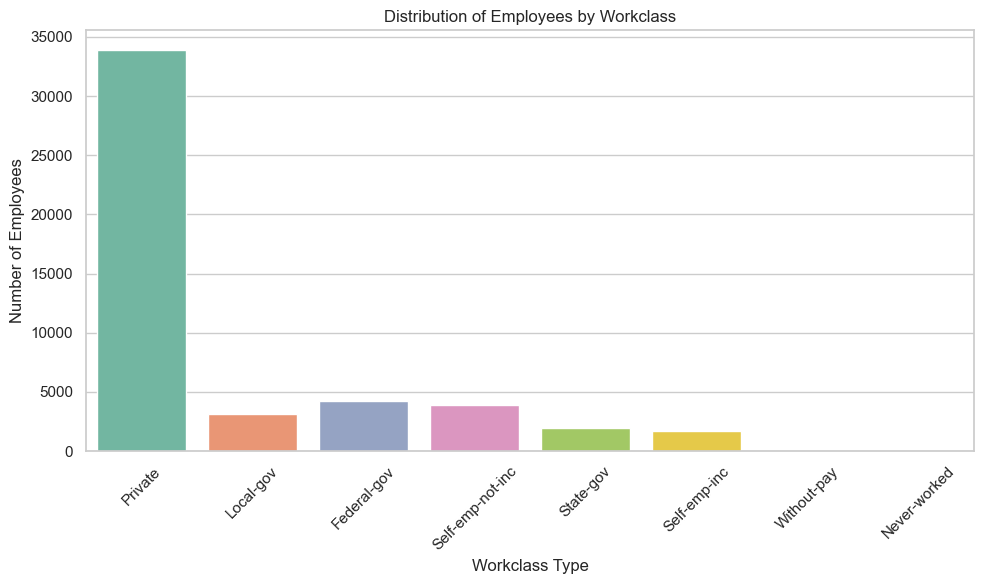

In [82]:
plt.figure(figsize=(10, 6))

# Plot the distribution of workclass
sns.countplot(data=df, x='workclass', palette='Set2')

# Customize the plot
plt.title('Distribution of Employees by Workclass')
plt.xlabel('Workclass Type')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


In [85]:
print(df.columns)


Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia', 'income',
       'workclass'],
      dtype='object', length=102)


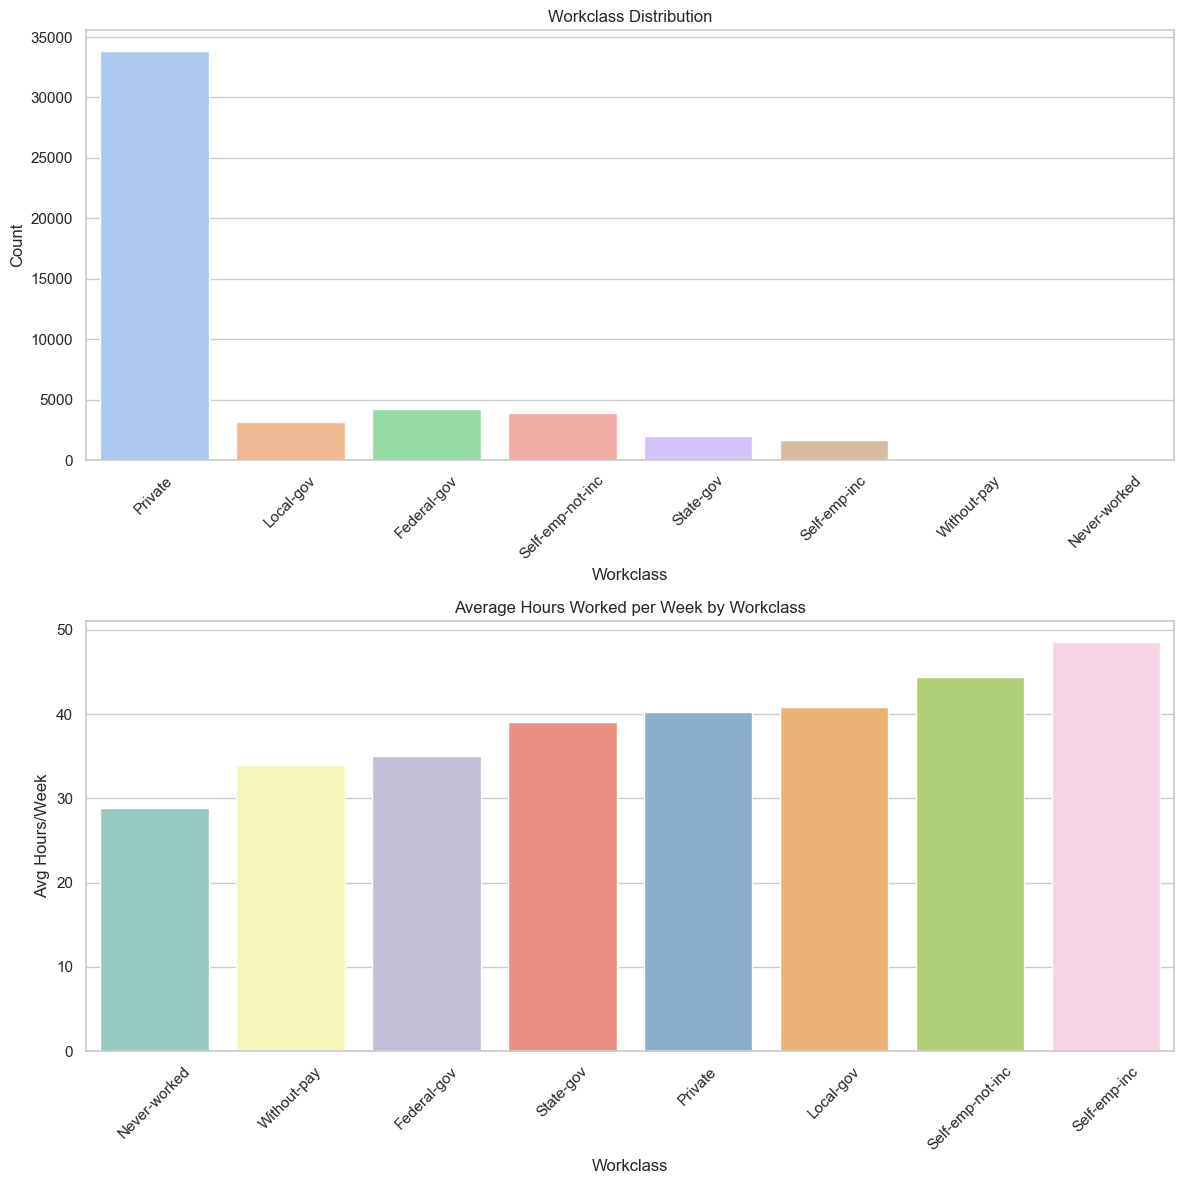

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with 2 subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Plot 1: Workclass count
sns.countplot(data=df, x='workclass', ax=ax[0], palette='pastel')
ax[0].set_title('Workclass Distribution')
ax[0].set_xlabel('Workclass')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

# Plot 2: Average Hours per Week by Workclass
avg_hours = df.groupby('workclass')['hours-per-week'].mean().sort_values()
sns.barplot(x=avg_hours.index, y=avg_hours.values, ax=ax[1], palette='Set3')
ax[1].set_title('Average Hours Worked per Week by Workclass')
ax[1].set_xlabel('Workclass')
ax[1].set_ylabel('Avg Hours/Week')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [92]:
print(df.columns.tolist())


['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machi

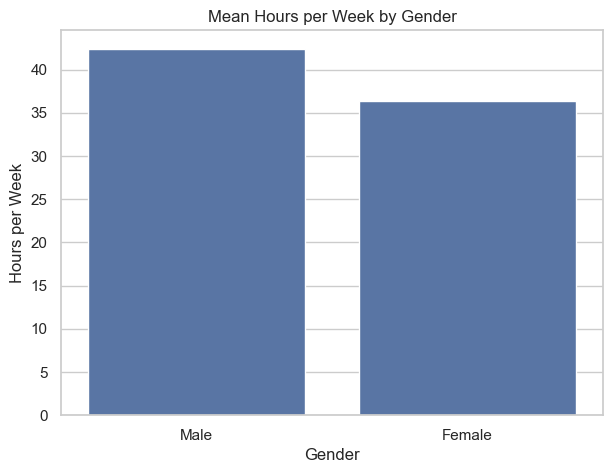

In [94]:

df['Gender'] = df['gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# Create the plot
plt.figure(figsize=(7, 5))
sns.barplot(x='Gender', y='hours-per-week', data=df, ci=None)
plt.title('Mean Hours per Week by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours per Week')
plt.show()


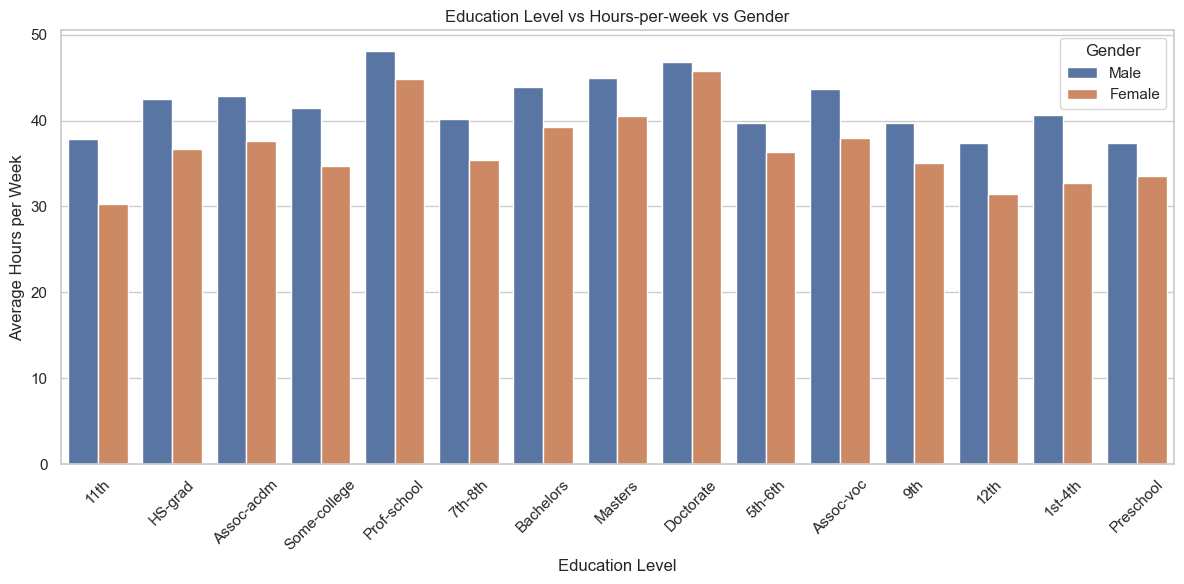

In [95]:
education_cols = [col for col in df.columns if col.startswith('education_')]
df['Education'] = df[education_cols].idxmax(axis=1).str.replace('education_', '')

# Reconstruct 'Gender' column
df['Gender'] = df['gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# Plot: Education level vs Hours-per-week vs Gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Education', y='hours-per-week', data=df, hue='Gender', ci=None)
plt.title('Education Level vs Hours-per-week vs Gender')
plt.xlabel('Education Level')
plt.ylabel('Average Hours per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

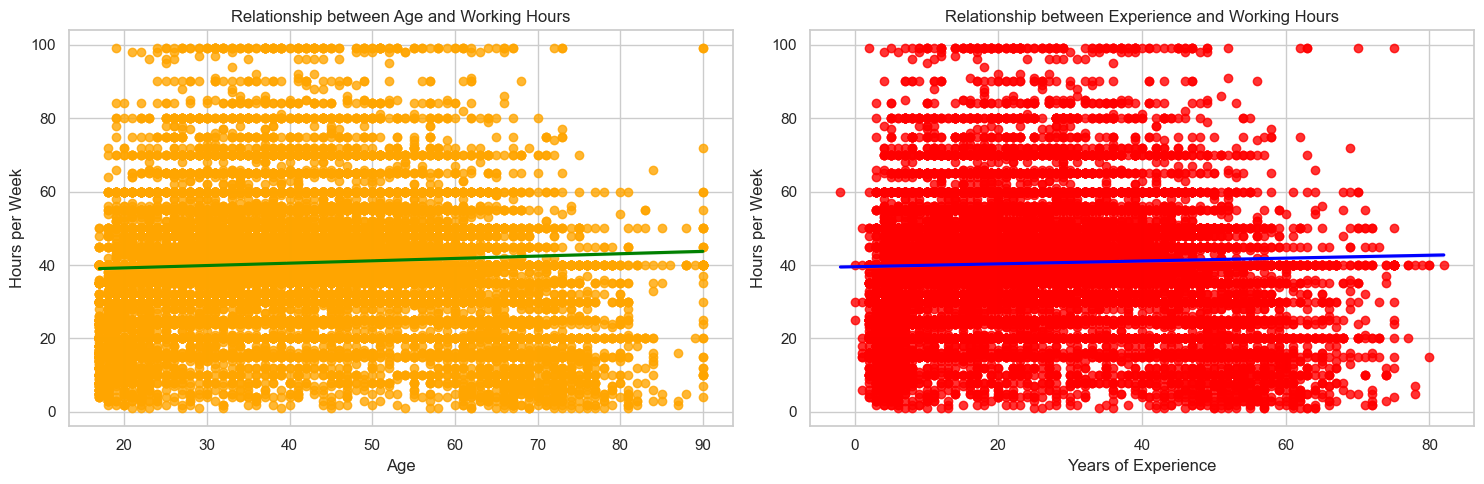

In [96]:
df['Experience'] = df['age'] - (df['educational-num'] + 6)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot: Age vs Hours-per-week
sns.regplot(x='age', y='hours-per-week', data=df,
            scatter_kws={'color': 'orange'}, line_kws={'color': 'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Working Hours',
          xlabel='Age', ylabel='Hours per Week')

# Scatter plot: Experience vs Hours-per-week
sns.regplot(x='Experience', y='hours-per-week', data=df,
            scatter_kws={'color': 'red'}, line_kws={'color': 'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and Working Hours',
          xlabel='Years of Experience', ylabel='Hours per Week')

plt.tight_layout()
plt.show()

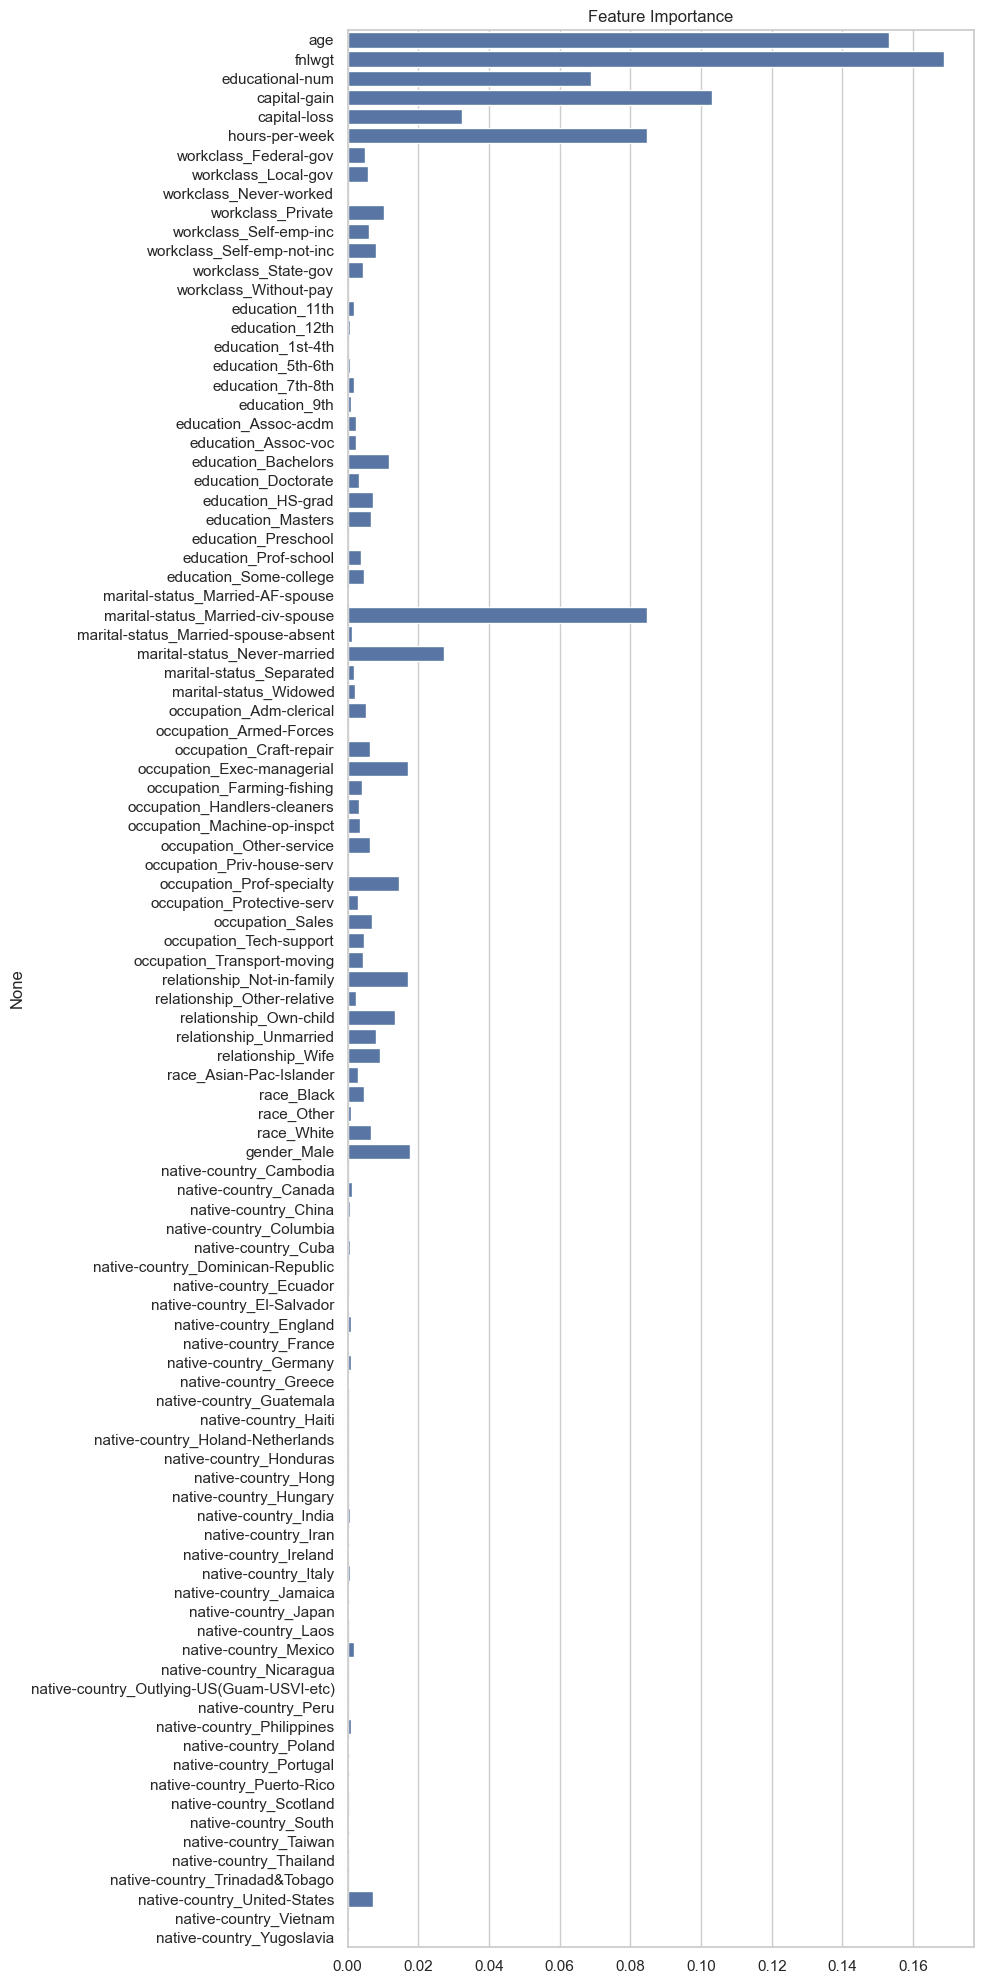

In [100]:
importances = model.feature_importances_
features = X.columns

# Visualize
plt.figure(figsize=(10,20))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [101]:
def predict_salary(sample_index):
    sample = X.iloc[sample_index]
    sample_reshaped = sample.values.reshape(1, -1)
    
    prediction = model.predict(sample_reshaped)[0]
    result_text = "Income >50K " if prediction == 1 else "Income <=50K "
    employee_name = f"Employee #{sample_index + 1}"
    
    # Print clean summary
    print("="*50)
    print(f" Predicting salary for {employee_name}")
    print("-"*50)
    print(f" Key Features (first 6):")
    print(sample.head(6).to_string())  # only show first few features
    print("-"*50)
    print(f" Prediction Result: {result_text}")
    print("="*50)


predict_salary(0)


 Predicting salary for Employee #1
--------------------------------------------------
 Key Features (first 6):
age                    25
fnlwgt             226802
educational-num         7
capital-gain            0
capital-loss            0
hours-per-week         40
--------------------------------------------------
 Prediction Result: Income <=50K 
